In [98]:
import numpy as np
import matplotlib.pyplot as plt


In [99]:
import pandas as pd

In [100]:
data = pd.read_csv('train.csv')

In [101]:
data = data.to_numpy()

In [102]:
data.shape

(42000, 785)

In [103]:
Y_temp = data[:1000,0]
Y = Y_temp.reshape(-1) #same results as below
Y = np.eye(10)[Y]
print(Y)

[[0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [104]:
"""
Y_temp = data[:,0]

Y = np.zeros((X.shape[0], 10))
for i in Y_temp:
    for j in range(10):
        if Y_temp[i]==j:
            Y[i][j]=1
        
print(Y)
"""

'\nY_temp = data[:,0]\n\nY = np.zeros((X.shape[0], 10))\nfor i in Y_temp:\n    for j in range(10):\n        if Y_temp[i]==j:\n            Y[i][j]=1\n        \nprint(Y)\n'

In [105]:
X = data[ :1000 , 1:]

X_temp = np.reshape(X, (Y.shape[0], 28, 28))

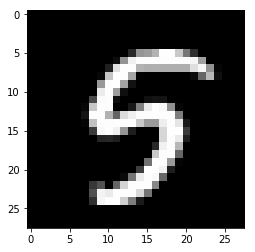

In [106]:
plt.imshow(X_temp[8], cmap = 'gray', vmin=0, vmax = 255)

In [107]:
X = X.T

In [108]:
X.shape

(784, 1000)

## Neural Network with predetermined number of layers

We start with a three layers network for digit recognition. Let's train the weigths through backpropagation for this task. 

In [143]:
def random_initialisation():
    
    """Function supposed to initialize with random numbers the weights and bias 
    for a neural network of 3 layers with respectively 16, 16 and 10 neurons
    Our input layer is of size 784 (28x28 pixel image)"""
    
    W1 = np.random.randn(16, 784)*0.01
    b1 = np.zeros((16, 1))
    
    W2 = np.random.randn(16, 16)*0.01
    b2 = np.zeros((16, 1))
    
    W3 = np.random.randn(10, 16)*0.01
    b3 = np.zeros((10, 1))

    
    parameters ={
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3
    }
    
    return parameters

In [110]:
def sigmoid(Z):
    A = 1/(1 + np.exp(-Z))
    cache = Z
    return A, cache

In [111]:
def relu(Z):
    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)
    cache = Z
    return A, cache

In [112]:
def linear_forward(A, W, b):
    Z = np.dot(W, A)+b
    
    cache  = (A, W, b)
    
    return Z, cache

In [113]:
def linear_activation_forward(A_prev, W, b, activation):
    
    if activation == "sigmoid":
        Z, linear_cache = linear_forward( A_prev,W, b)
        A , activation_cache= sigmoid(Z)
    
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev,W, b)
        A , activation_cache= relu(Z)
     
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
        
    return A, cache

In [142]:
def compute_cost(A, Y):
    m = Y.shape[0]
    cost = (-1/m)* np.sum(np.multiply(Y,np.log(A)) + np.multiply((1-Y),np.log(1 - A)))
    
    cost = np.squeeze(cost)
    assert(cost.shape==())
    
    return cost

In [115]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    
    dW = (1/m)*np.dot(dZ, A_prev.T)
    db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [116]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
     
    dZ[Z <= 0] = 0 #which is equal to 0 when Z <= 0
    
    assert(dZ.shape==Z.shape)
    
    return dZ

In [117]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    #dZ = np.array(dA, copy=True)
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)  #sigmoid derivative
    
    assert(dZ.shape == Z.shape)
    
    return dZ

In [118]:
def linear_activation_backward(dA, cache, activation):
    
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    return dA_prev, dW, db

In [126]:
def update_parameters(parameters, grads, learning_rate):
    
    for i in range(3):
        parameters["W"+ str(i+1)]=parameters["W"+str(i+1)]-learning_rate*grads["dW"+str(i+1)]
        parameters["b"+ str(i+1)]=parameters["b"+str(i+1)]-learning_rate*grads["db"+str(i+1)]
        
    return parameters

In [144]:
def three_layers_network(X, Y, learning_rate = 0.0075, num_iterations = 500):
    
    grads = {}
    costs = []
    m = X.shape[1]
    A0 = X
    Y = Y.T
    
    #initializing
    parameters = random_initialisation()
    
    
    for n in range(num_iterations): 
        #forwardProp
        A1, cache1 = linear_activation_forward(A0, parameters["W1"], parameters["b1"], "relu") 

        A2, cache2 = linear_activation_forward(A1, parameters["W2"], parameters["b2"], "relu") 

        A3, cache3 = linear_activation_forward(A2, parameters["W3"], parameters["b3"], "sigmoid") 
        
        #compute cost
        cost = compute_cost(A3, Y)
        
        #backpropagation
        dA3 = - (np.divide(Y, A3) - np.divide(1-Y, 1-A3))

        dA2, dW3, db3 = linear_activation_backward(dA3, cache3, "sigmoid")
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "relu")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")

        grads['dW1']= dW1
        grads['db1']= db1
        grads['dW2']= dW2
        grads['db2']= db2
        grads['dW3']= dW3
        grads['db3']= db3

        parameters = update_parameters(parameters, grads, learning_rate)
    
        #print cost every 100 iterations
        if n%100==0:
            print("Cost after iteration {} : {}".format(n, cost))
            costs.append(cost)
    
    #let's plot cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('num iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0 : 692.3228743835657
Cost after iteration 100 : 155.02232108422328
Cost after iteration 200 : 51.99257967265528
Cost after iteration 300 : 16.872208599613554
Cost after iteration 400 : 7.217838120954389


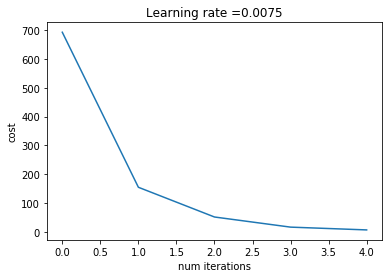

In [145]:
para= three_layers_network(X, Y)